# UMAP for dependency analysis
This notebook tackles objective 5.b.2 (Highlight dependencies and relationships between sections) 

UMAP is a method that maps high dimensional data to a lower dimension. Here we use embeddings from the custom 
embedder to show how sentences and handbooks cluster. The results are visualised in 3D and 2D space.

In [2]:
import json
import pickle
from sentence_transformers import SentenceTransformer
import umap
import umap.plot
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '../')
from utils import full_sents_to_parts, co_ref_sentences
style.use('default')

/home/mattmdjaga/anaconda3/envs/rssb_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading co-referenced sentences which will be used for the UMAP analysis. And keeping track of which handbook 
each sentence belongs to. Then embedding the sentences.

In [3]:
sents = co_ref_sentences('../data/handbooks.pt', '../models/ner_model')
vals = []
keys = []
for data in sents.values():
    for x in data:
        if x[0] not in vals:
            vals.append(x[0])
            keys.append(x[1])
embeder = SentenceTransformer('../models/custom_embedder')
embeddings = embeder.encode(vals)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Using UMAP to plot the embeddings in a smaller 3D space. The different colours represent different 
handbooks. We can see that a lot of clusters are based on the same handbook but not all. A 
more clear visualisation is next.

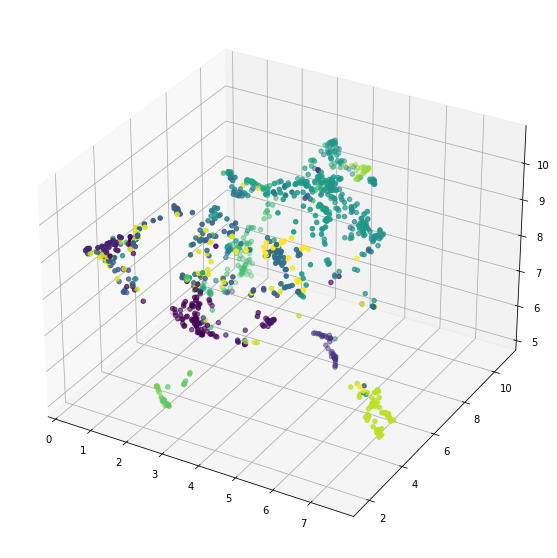

In [4]:
import umap
mapper = umap.UMAP(n_components=3,metric='euclidean')
u = mapper.fit_transform(embeddings)
key_nums = [int(key[9:11].strip()) for key in keys]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], u[:,2],c=key_nums)


2D UMAP plot of the embeddings. Here we can see which handbooks are present in the different 
areas of the plot. We can take a closer look in the next section.

<AxesSubplot:>

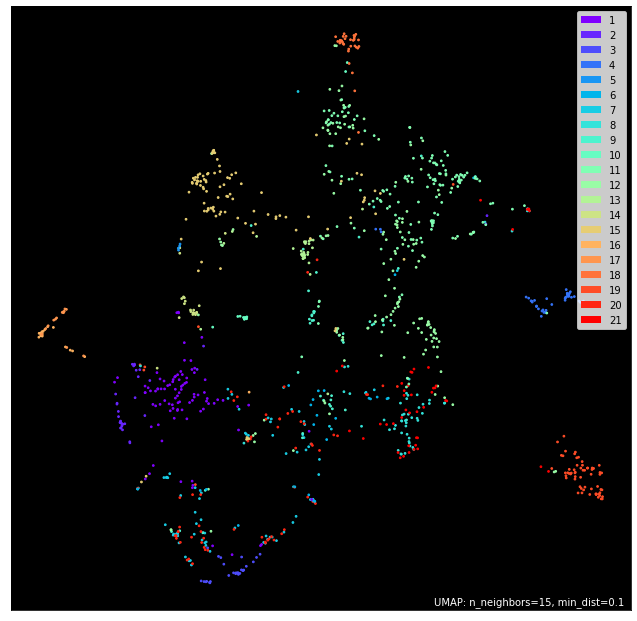

In [5]:
mapper = umap.UMAP(metric='euclidean').fit(embeddings)
import numpy as np
umap.plot.points(mapper,labels = np.asarray(key_nums),theme='fire')

Interactive version of the above plot. Here we can hover over the different points to see which 
specific senteces they represent which gives us a better idea of what different clusters 
represent. 

In [6]:
hover_data = pd.DataFrame({'index':vals,
                           'label':key_nums})
umap.plot.output_notebook()
p = umap.plot.interactive(mapper, labels=key_nums, hover_data=hover_data, point_size=5, theme='fire')
umap.plot.show(p)

Loading BokehJS ...

In [16]:
mapper.embedding_[0]
dist_list = []
n = len(mapper.embedding_)
for i in range(0,n):
    for j in range(i+1,n):
        # get euclidean distance between two points in embedding space i and j
        dist = np.linalg.norm(mapper.embedding_[i] - mapper.embedding_[j])
        dist_list.append((i,j,dist))


In [26]:
sorted_dist_list = sorted(dist_list, key=lambda x: x[2])
for i,j,dist in sorted_dist_list[:5]:
    print(f"Sentence 1: {vals[i]}")
    print(f"Sentence 2: {vals[j]}")
    print(f"Distance: {dist}")
    print("\n")

Sentence 1: signalling technician must come to a clear understanding with the signaller as to which controls are to be released.
Sentence 2: signalling technician must then: restore the signalling controls, tell the signaller when signalling technician have done this.,
Distance: 0.0011110700434073806


Sentence 1: iwa may place detonator protection for a possession as long as the PICOP has assured iwa that the protecting signal for the line concerned has been placed to danger.
Sentence 2: picop do not need to arrange detonator protection on a single line if picop use the token to provide protection.
Distance: 0.0013920026831328869


Sentence 1: Conditions - swl, lookouts lookout warning may set up a safe system of work using one or more lookouts as long as all of the following conditions apply.There is no realistic alternative safe system of work that can beused., Using lookouts at that location is not prohibited., swl, lookouts lookout warning do not act as a lookout., There will be n